# Physical preprocessing steps


In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

## Orientation


At first we load the brain mri and extract the volume:

In [2]:
brain_mri = nib.load("IXI662-Guys-1120-T1.nii.gz")
brain_mri_data = brain_mri.get_fdata()

Then we extract its shape and affine matrix

In [3]:
shape = brain_mri.shape
affine = brain_mri.affine
print(affine)
print(shape)

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(256, 256, 150)


In [4]:
affine[:, 3:]

array([[ -90.67985535],
       [ 102.82944489],
       [-114.82378387],
       [   1.        ]])

We can access the size of a voxel in the volume by using the **header.get_zooms()** function provided by nibabel.
It returns the size of a voxel in all directions in mm.

In [5]:
print(brain_mri.header.get_zooms())

(0.9375, 0.9375, 1.2000039)


You can slice through the volume in all orientations: axial, coronal and sagittal.<br />
**NOTE: Depending on the orientation of the scan, the indices change**<br />
Sometimes the first axis slices axial, sometimes coronal and sometimes sagittal.

You can find out the orientation by using **nib.aff2axcodes(affine)**

In [6]:
nib.aff2axcodes(affine)

('P', 'S', 'R')

In this case, the orientation of the scan is:
* **from anterior to posterior (from front to back) --> Coronal**
* **from inferior to superior (from bottom to top) --> Axial**
* **from left to right --> Saggital**

The letters returned from aff2axcodes always indicate the end of the corresponding axis.

Let's slice through all orientations to get a feeling for it:

At first we move along the first axis (anterior to posterior). This moves through the head from the face to the back of the head.<br /> **Coronal View**

Function definition and declaration

In [7]:
brain_mri_data.shape

(256, 256, 150)

In [8]:
def plot_mri(brain_mri_data, slice1, slice2): # We give this axis due to nib.aff2axcodes(affine) function return value
    fig, axis = plt.subplots(1, 2)
    print(slice1, slice2)
    axis[0].imshow(brain_mri_data[slice1], cmap = "gray")
    axis[1].imshow(brain_mri_data[slice2], cmap = "gray")

(60, slice(None, None, None), slice(None, None, None)) (160, slice(None, None, None), slice(None, None, None))


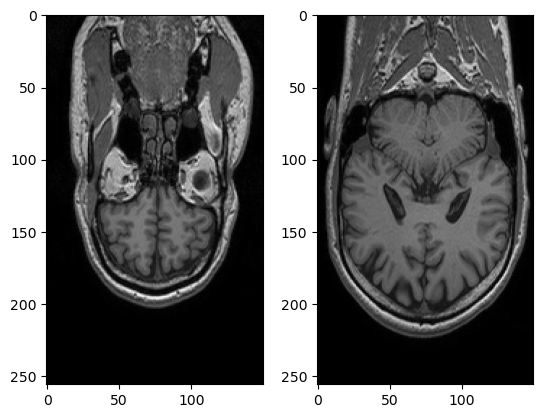

In [9]:
plot_mri(brain_mri_data, np.s_[60,:,:], np.s_[160,:,:])

Next we slice along the second axis which moves from the lower jaw/ neck to the top of the head. <br />
**Axial view**

(slice(None, None, None), 120, slice(None, None, None)) (slice(None, None, None), 95, slice(None, None, None))


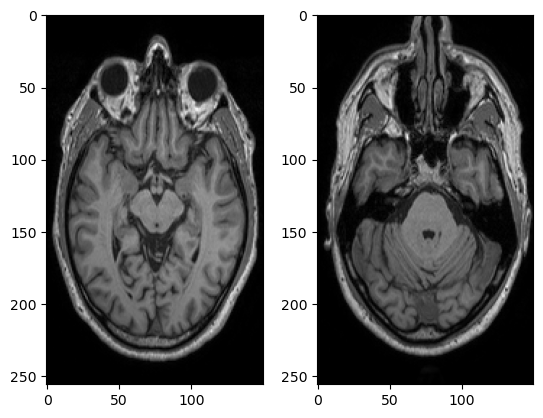

In [10]:
plot_mri(brain_mri_data, np.s_[:,120,:], np.s_[:,95,:])

And finally we slice through the third axis which moves from the right ear to the left ear. <br />
**Sagital view**

(slice(None, None, None), slice(None, None, None), 130) (slice(None, None, None), slice(None, None, None), 100)


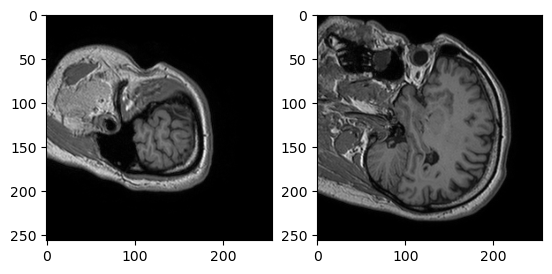

In [11]:
plot_mri(brain_mri_data, np.s_[:,:,130], np.s_[:,:,100])

(slice(None, None, None), slice(None, None, None), 20) (slice(None, None, None), slice(None, None, None), 45)


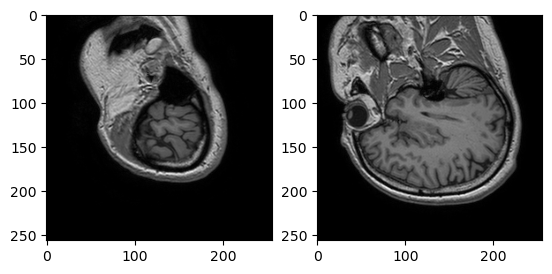

In [12]:
brain_mri_swapped = np.swapaxes(brain_mri_data, 0, 1)
plot_mri(brain_mri_swapped, np.s_[:,:,20], np.s_[:,:,45])

You can use np.flip(arr, axis) to flip the axis and thus changes the orientation to top->bottom.<br />
**CAUTION: This does not change the affine matrix and must only be used for validation purposes**

(slice(None, None, None), slice(None, None, None), 20) (slice(None, None, None), slice(None, None, None), 100)


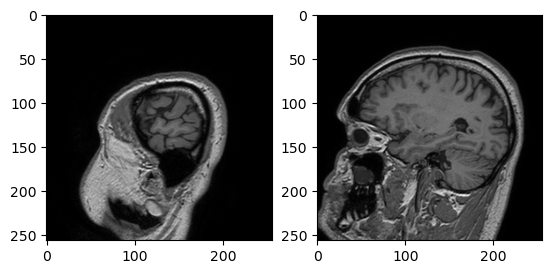

In [13]:
plot_mri(np.flip(brain_mri_swapped, 0),np.s_[:,:,20], np.s_[:,:,100])

## Reorientation

If you want, you can reorient the volume to RAS by using **nibabel.as_closest_canonical(nifti)**<br />
This is also called canonical orientation

In [14]:
brain_mri_canonical = nib.as_closest_canonical(brain_mri)
brain_mri_canonical_data = brain_mri_canonical.get_fdata()

In [15]:
canonical_affine = brain_mri_canonical.affine
print(affine)
print(nib.aff2axcodes(affine))
print("----")
print(canonical_affine)
print(nib.aff2axcodes(canonical_affine))
brain_mri_canonical_data.shape

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
('P', 'S', 'R')
----
[[ 1.19975281e+00 -1.89821944e-02 -2.72075552e-03 -8.58393958e+01]
 [ 2.45456006e-02  9.27821696e-01  1.32986516e-01 -1.33765088e+02]
 [ 5.71511449e-11 -1.33014351e-01  9.28015888e-01 -8.09051243e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
('R', 'A', 'S')


(150, 256, 256)

Lets visualize

(50, slice(None, None, None), slice(None, None, None)) (125, slice(None, None, None), slice(None, None, None))


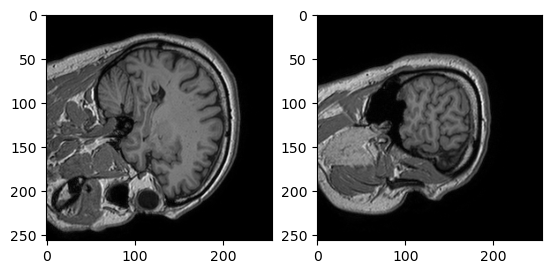

In [16]:
plot_mri(brain_mri_canonical_data, np.s_[50, :, :], np.s_[125, :, :])

(slice(None, None, None), 40, slice(None, None, None)) (slice(None, None, None), 90, slice(None, None, None))


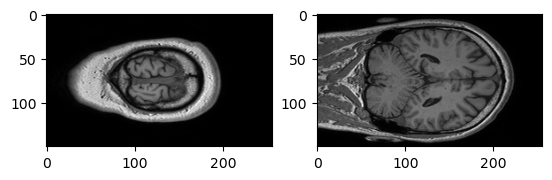

In [17]:
plot_mri(brain_mri_canonical_data, np.s_[:, 40, :], np.s_[:, 90, :])

(slice(None, None, None), slice(None, None, None), 55) (slice(None, None, None), slice(None, None, None), 70)


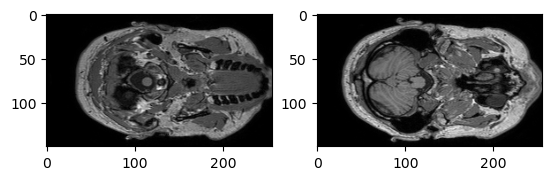

In [18]:
plot_mri(brain_mri_canonical_data, np.s_[:, :, 55], np.s_[:, :, 70])

# Resampling

You might also want to change the size of your scan as it might be too large for your system.
However, resizing a volume is not as easy as resizing an image because the voxel size needs to be changed.

Let's resize our brain mri from (256, 256, 150) to (128, 128, 100)

In [19]:
print(brain_mri.shape)
print(brain_mri.header.get_zooms())
print(nib.aff2axcodes(brain_mri.affine))

(256, 256, 150)
(0.9375, 0.9375, 1.2000039)
('P', 'S', 'R')


To do so, you can use **conform(input, desired_shape, voxel_size)** from nibabel.processing which resamples the image to the desired shape.
Note that you have to change the voxel size as otherwise it would become impossible to reduce the size!
Let's simply use a voxel size of $(2 \times 2 \times 2)$mm

In [20]:
import nibabel.processing

In [21]:
voxel_size = (2, 2, 2)
brain_mri_resized = nibabel.processing.conform(brain_mri, (128, 128, 100), voxel_size, orientation="PSR")
brain_mri_resized_data = brain_mri_resized.get_fdata()

In [22]:
print(brain_mri.shape)
print(brain_mri_resized.shape)
print(brain_mri_resized.header.get_zooms())

(256, 256, 150)
(128, 128, 100)
(2.0, 2.0, 2.0)


As you can see, the resampled image still look similar to the original! 

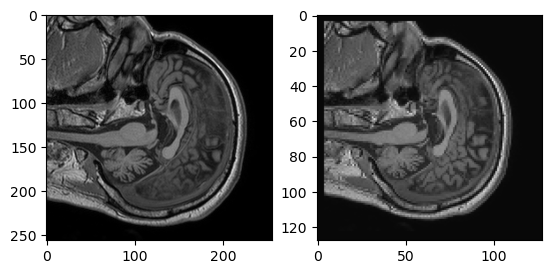

In [23]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[:, :, 75], cmap = "gray")
axis[1].imshow(brain_mri_resized_data[:, :, 50], cmap = "gray")

## Normalization and standardization

    X-RAY --> Z-transform and 1:255 scaling
    CT --> 1:3071 and Window, cropping
    MRI --> Z-transform(individual  subject), Min-Max scaling(individual sunject), Cropping
    PET images --> Clip values at 20-40 scaling , log
    Ultra Sound -->Z-transform and 1:255 scaling

## CT

As CTs have a fixed scale from -1000 (air) to 1000 (water) (This is called Houndsfield unit) you normally do not perform normalization to keep those scales.

In practice, you can assume that the values are between -1024 and 3071.

Thus you can standardize the data by dividing the volume by 3071.

In [24]:
lung_ct = nib.load("lung_043.nii.gz")
lung_ct_data = lung_ct.get_fdata()

In [25]:
lung_ct_data_standardized = lung_ct_data / 3071

Note that the standardized CT looks the same as the original.

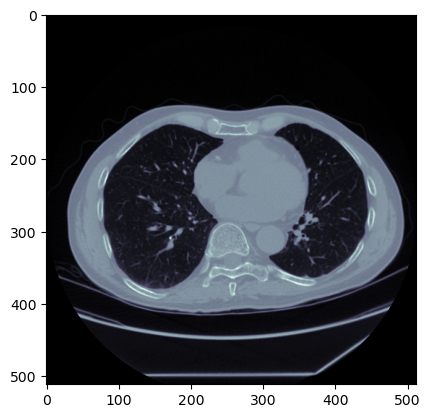

In [26]:
plt.figure()
plt.imshow(np.rot90(lung_ct_data_standardized[:, :, 50]), cmap = "bone")

## Windowing:

Depending on the task you perform you want to have a different contrast.<br />
As an example, if you want to inspect the lung it is important to be able to view all small vessels.<br />
In contrast, when examining the body it is important to have a high contrast, to be able to differentiate between different tissues.

This change in contrast is called windowing.<br />
There are typically four different windows, a lung window, a bone window,  a soft-tissue window and a brain window.<br />
You can create such a window, by clipping all pixel values larger than a threshold.

Let's take a look at the lung- and the soft-tissue window.


To get a nice lung window, you can clip all values larger than -1000 to -500. Note that this window completely denies us to take a look at the abdomen as everything looks identical.

In X-ray images we use active imaging, which means that we beam x-rays to object or person and than we collect the reflected waves.
And most reflected part looks darker in the image and others whiter.
If we clip all the values between

Function decleration and definition

In [27]:
def plot_window(lung_ct_data, low, high):
    lung_ct_lung_window = np.clip(lung_ct_data, low, high)
    fig, axis = plt.subplots(1, 2)
    axis[0].imshow(np.rot90(lung_ct_lung_window[:, :, 50]), cmap = "gray")
    axis[1].imshow(np.rot90(lung_ct_lung_window[:, :, 60]), cmap = "gray")
    axis[0].axis("off")
    axis[1].axis("off")
    fig.suptitle("Lung Window")
    plt.tight_layout()
    plt.savefig("lung_window.png", bbox_inches="tight")

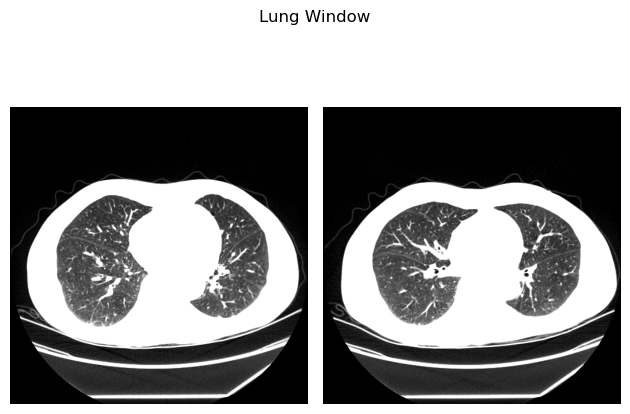

In [28]:
plot_window(lung_ct_data, -1000, -500)

To get a nice soft-tissue window, you can clip all values in bweteen -250 and 250. Here the lung ist almost black but you have a nice image of the abdomen.

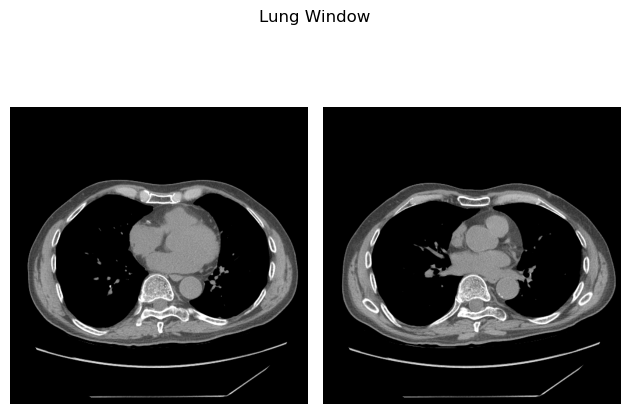

In [29]:
plot_window(lung_ct_data, -250, 250)

Bone window. We clip the values between 60-100. These values are not standardized i found them by trying new values. You can see bones clearly in this window.

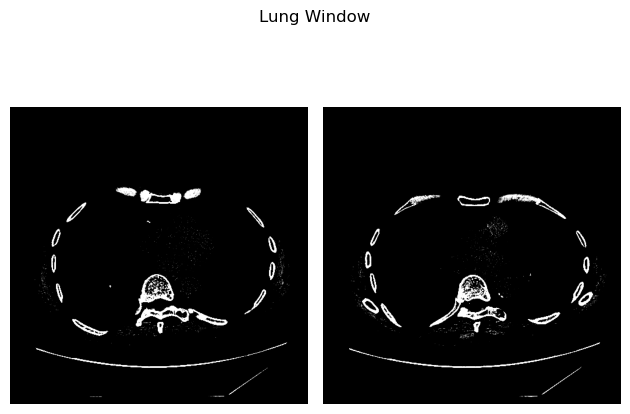

In [30]:
plot_window(lung_ct_data, 60, 100)

## MRI
In contrast to CTs MRI images do not have an absolute, fixed scale and each patient varies.

Thus you can z-normalize the scans in a patient-wise manner.

$$ X_{\text{norm}} = \frac{X - \mu}{\sigma}$$

Additionally you can perform min-max scaling.
$$X_{\text{standardized}} = \frac{X - min(X)}{max(X)-min(X)} $$

To demonstrate this, we will use a cardiac MRI from the medical segmentation decathlon atrium segmentation task. (Same links as for the CT)


In [31]:
cardiac_mri = nib.load("la_003.nii.gz")
cardiac_mri_data = cardiac_mri.get_fdata()

In [32]:
mean, std = np.mean(cardiac_mri_data), np.std(cardiac_mri_data)
cardiac_mri_norm = (cardiac_mri_data - mean) / std
print(np.max(cardiac_mri_norm), np.min(cardiac_mri_norm))

6.9351172347338705 -0.6559727001559823


In [33]:
cardiac_mri_standardized = (cardiac_mri_norm - np.min(cardiac_mri_norm)) / (np.max(cardiac_mri_norm)- np.min(cardiac_mri_norm))
print(np.max(cardiac_mri_standardized), np.min(cardiac_mri_standardized))

1.0 0.0


(320, 320, 130) ('R', 'A', 'S')


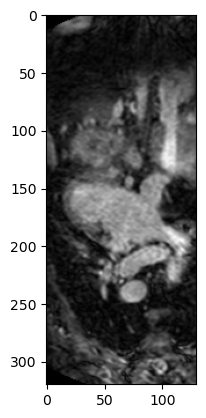

In [34]:
print(cardiac_mri_standardized.shape, nib.aff2axcodes(cardiac_mri.affine))
plt.figure()
plt.imshow(cardiac_mri_standardized[150,:,:], cmap = "gray")

Typically there is no windowing in MRI scans.